In [1]:
!pip install keras 

In [2]:
!pip install tensorflow 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
X_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [8]:
y_train[1]

0

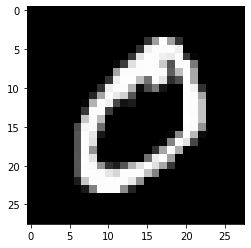

In [9]:
plt.imshow(X_train[1, :, :], cmap='gray')

In [11]:
X_train = X_train.reshape(60000, 784)
X_test  = X_test.reshape(10000, 784)

In [12]:
X_train = X_train / 255
X_test  = X_test / 255

In [13]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [14]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [15]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [16]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [24]:
model = MLPClassifier(
    hidden_layer_sizes=(),
    alpha=0.3,
    verbose=True,
    random_state=42
)

In [25]:
model.fit(X_train, y_train)

Iteration 1, loss = 2.17868624
Iteration 2, loss = 1.20764202
Iteration 3, loss = 1.04012126
Iteration 4, loss = 0.97245427
Iteration 5, loss = 0.93771958
Iteration 6, loss = 0.91680962
Iteration 7, loss = 0.90297993
Iteration 8, loss = 0.89267518
Iteration 9, loss = 0.88465874
Iteration 10, loss = 0.87792134
Iteration 11, loss = 0.87219171
Iteration 12, loss = 0.86701583
Iteration 13, loss = 0.86236987
Iteration 14, loss = 0.85801238
Iteration 15, loss = 0.85400209
Iteration 16, loss = 0.85058467
Iteration 17, loss = 0.84733627
Iteration 18, loss = 0.84409006
Iteration 19, loss = 0.84112693
Iteration 20, loss = 0.83855347
Iteration 21, loss = 0.83622968
Iteration 22, loss = 0.83355537
Iteration 23, loss = 0.83164702
Iteration 24, loss = 0.82970002
Iteration 25, loss = 0.82792397
Iteration 26, loss = 0.82619057
Iteration 27, loss = 0.82487083
Iteration 28, loss = 0.82315702
Iteration 29, loss = 0.82233927
Iteration 30, loss = 0.82052960
Iteration 31, loss = 0.81999797
Iteration 32, los

MLPClassifier(alpha=0.3, hidden_layer_sizes=(), random_state=42, verbose=True)

In [26]:
model.score(X_test, y_test)

0.8201

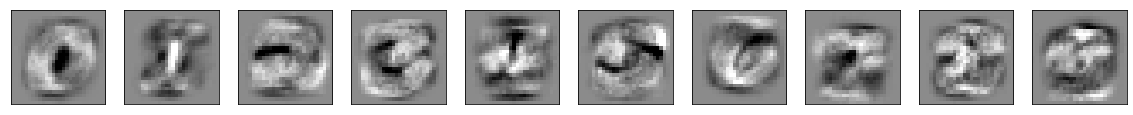

In [27]:
plt.rcParams['figure.figsize'] = 20, 20

fig, axes = plt.subplots(1, 10)
vmin, vmax = model.coefs_[0].min(), model.coefs_[0].max()
for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap='gray', vmin=0.5*vmin, vmax=0.5*vmax)
    ax.set_xticks(())
    ax.set_yticks(())
    
plt.show()